<a href="https://colab.research.google.com/github/Devanshu0502/DMSP_Particle_Precipitation/blob/main/DMSP_Particle_Precipitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://zenodo.org/record/4281122/files/AI_Ready_DMSP_Data.csv

## Importing Importing Libraries

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import time

from pickle import dump
import joblib

# from keras import backend as K
import keras as k
from keras import utils, models, layers, optimizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.layers import Dense, GRU, BatchNormalization, Activation, LSTM, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential

## Importing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Projects/AI_Ready_DMSP_Data.csv')

In [5]:
# printing first few rows of the dataset
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [6]:
df.shape

(77367, 154)

In [7]:
# creating the copy of the dataset
df_cumulative = df.copy()

In [8]:
# changing the date column into datetime format
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

In [9]:
# list the columns
df_cumulative.columns.to_list()

['SC_AACGM_LAT',
 'SC_AACGM_LTIME',
 'ELE_TOTAL_ENERGY_FLUX',
 'ELE_TOTAL_ENERGY_FLUX_STD',
 'ELE_AVG_ENERGY',
 'ELE_AVG_ENERGY_STD',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AE',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'vx',
 'psw',
 'borovsky',
 'newell',
 'F107_6hr',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AE_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'vsw_6hr',
 'vx_6hr',
 'psw_6hr',
 'borovsky_6hr',
 'newell_6hr',
 'F107_5hr',
 'Bz_5hr',
 'By_5hr',
 'Bx_5hr',
 'AE_5hr',
 'AL_5hr',
 'AU_5hr',
 'SymH_5hr',
 'PC_5hr',
 'vsw_5hr',
 'vx_5hr',
 'psw_5hr',
 'borovsky_5hr',
 'newell_5hr',
 'F107_3hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AE_3hr',
 'AL_3hr',
 'AU_3hr',
 'SymH_3hr',
 'PC_3hr',
 'vsw_3hr',
 'vx_3hr',
 'psw_3hr',
 'borovsky_3hr',
 'newell_3hr',
 'F107_1hr',
 'Bz_1hr',
 'By_1hr',
 'Bx_1hr',
 'AE_1hr',
 'AL_1hr',
 'AU_1hr',
 'SymH_1hr',
 'PC_1hr',
 'vsw_1hr',
 'vx_1hr',
 'psw_1hr',
 '

In [10]:
# Choose columns to drop
cols_to_drop = [c for c in df_cumulative.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('_5min'in c) | ('15min' in c)| ('5hr' in c) | ('F107_' in c) | ('vx' in c) | ('AE' in c) | ('newell' in c) | ('borovsky' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
df_cumulative = df_cumulative.drop(columns=cols_to_drop)

In [11]:
# List the new set of columns
df_cumulative.columns.to_list()

['SC_AACGM_LAT',
 'ELE_TOTAL_ENERGY_FLUX',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'psw',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'vsw_6hr',
 'psw_6hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AL_3hr',
 'AU_3hr',
 'SymH_3hr',
 'PC_3hr',
 'vsw_3hr',
 'psw_3hr',
 'Bz_1hr',
 'By_1hr',
 'Bx_1hr',
 'AL_1hr',
 'AU_1hr',
 'SymH_1hr',
 'PC_1hr',
 'vsw_1hr',
 'psw_1hr',
 'Bz_45min',
 'By_45min',
 'Bx_45min',
 'AL_45min',
 'AU_45min',
 'SymH_45min',
 'PC_45min',
 'vsw_45min',
 'psw_45min',
 'Bz_30min',
 'By_30min',
 'Bx_30min',
 'AL_30min',
 'AU_30min',
 'SymH_30min',
 'PC_30min',
 'vsw_30min',
 'psw_30min',
 'Bz_10min',
 'By_10min',
 'Bx_10min',
 'AL_10min',
 'AU_10min',
 'SymH_10min',
 'PC_10min',
 'vsw_10min',
 'psw_10min']

In [12]:
print('number of input features total = {}'.format(df_cumulative.shape[1]))

number of input features total = 73


In [13]:
# Define the threshold above which to remove energy flux values
eflux_threshold_quantile = 99.995
eflux_threshold = .99995

# Define the conversion factor from eV to erg
erg_eV_factor = (1.60218e-12)

In [14]:
# Remove outliers

print(df_cumulative.shape)
threshold_drop_val = np.percentile(df_cumulative['ELE_TOTAL_ENERGY_FLUX'],eflux_threshold_quantile)
print('... dropping rows where total electron energy flux is greater than {:.4E} [eV/cm2/s/ster]'.format(threshold_drop_val))
print('--------> number dropped = {}'.format(len( np.argwhere(df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values > threshold_drop_val) )))
#df_cumulative_LTIMEs = df_cumulative.LTIMEs[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
#df_cumulative_STDs = df_cumulative.STDs[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
df_cumulative = df_cumulative[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
print(df_cumulative.shape)

(77367, 73)
... dropping rows where total electron energy flux is greater than 3.9368E+15 [eV/cm2/s/ster]
--------> number dropped = 4
(77363, 73)


In [15]:
df_cumulative.describe()

,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
count,77363.000000,7.736300e+04,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,77363.000000,...,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000,77362.000000
mean,65.387655,2.942586e+11,12.737420,-0.010660,0.005544,-0.439728,-0.180498,0.032396,-0.078615,182.061155,...,1.921658,0.999876,0.039588,-0.302500,-79.667705,62.627853,-8.822523,0.588782,405.541934,1.934449
std,11.033138,2.247742e+13,1.094167,0.698633,0.715388,0.520797,0.709112,0.833193,0.546418,42.266323,...,1.774154,3.436340,4.252604,3.661881,85.741187,53.712068,16.925225,1.098843,72.189518,1.797954
min,45.000858,6.229923e+06,6.000000,-1.000000,-1.000000,-0.999917,-0.999963,-1.000000,-1.000000,68.900000,...,0.180000,-8.420000,-23.990000,-15.500000,-688.000000,-29.000000,-135.000000,-8.030000,264.600000,0.150000
25%,56.220178,3.561043e+08,12.000000,-0.704015,-0.722364,-0.849817,-0.838280,-0.915647,-0.492601,146.900000,...,1.000000,-1.250000,-3.040000,-3.120000,-104.000000,24.000000,-16.000000,-0.080000,357.400000,1.000000
50%,66.377877,7.890107e+08,13.000000,-0.008727,0.017452,-0.552435,-0.381689,0.212129,-0.115528,178.100000,...,1.440000,0.870000,0.100000,-0.470000,-46.000000,46.000000,-7.000000,0.410000,394.900000,1.440000
75%,74.094442,1.457374e+10,13.000000,0.672367,0.728371,-0.196673,0.527078,0.900469,0.322449,215.100000,...,2.220000,2.850000,3.150000,2.600000,-24.000000,84.000000,1.000000,1.180000,436.300000,2.240000
max,89.899278,3.542682e+15,15.000000,1.000000,1.000000,0.999991,1.000000,1.000000,1.000000,284.000000,...,47.000000,55.470000,23.460000,36.270000,25.000000,379.000000,69.000000,9.990000,832.300000,45.760000


In [17]:
# separate training data and validation data
mask_val = [(df_cumulative.index.year == 2001) & (df_cumulative['ID_SC'].values>6)]

In [18]:
# storing the data of the year 2002 as a validation set
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_val.head()

,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
Datetimes,,,,,,,,,,,,,,,,,,,,,
2001-01-01 06:51:00,73.922498,3.107251e+08,12.0,0.975342,-0.220697,0.017213,0.999852,-0.060503,-0.998168,165.3,...,2.29,-2.41,-0.34,-3.17,-156.0,40.0,-9.0,0.88,290.8,2.70
2001-01-01 06:54:00,67.226807,5.408906e+08,12.0,0.972370,-0.233445,0.017213,0.999852,0.372107,-0.928190,165.3,...,2.29,-2.41,-0.34,-3.17,-156.0,40.0,-9.0,0.88,290.8,2.70
2001-01-01 06:58:00,55.034913,3.561043e+08,12.0,0.968148,-0.250380,0.017213,0.999852,0.608040,-0.793907,165.3,...,1.90,-2.57,-0.34,-3.47,-178.0,45.0,-8.0,0.93,288.5,2.34
2001-01-01 07:00:00,48.654315,3.196454e+08,12.0,0.965926,-0.258819,0.017213,0.999852,0.665768,-0.746159,165.3,...,2.27,-2.29,0.04,-3.54,-176.0,47.0,-8.0,0.80,288.6,2.34
2001-01-01 07:28:00,49.964592,7.835596e+09,12.0,0.927184,-0.374607,0.017213,0.999852,0.979876,-0.199608,165.3,...,2.39,-2.30,0.75,-3.76,-26.0,34.0,-10.0,0.43,286.6,1.84


In [19]:
# storing rest of the data as training data
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])
df_train.head()

,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
Datetimes,,,,,,,,,,,,,,,,,,,,,
1987-01-12 12:57:00,51.143220,2.057827e+08,6.0,-0.246153,-0.969231,0.205104,0.97874,0.996134,0.087845,68.9,...,3.61,1.25,6.52,-3.03,-36.0,19.0,4.0,0.71,364.4,3.09
1987-01-12 12:58:00,54.137207,2.509837e+08,6.0,-0.250380,-0.968148,0.205104,0.97874,0.992626,0.121216,68.9,...,3.61,1.25,6.52,-3.03,-36.0,19.0,4.0,0.71,364.4,3.09
1987-01-12 13:01:00,62.928176,4.469146e+08,6.0,-0.263031,-0.964787,0.205104,0.97874,0.968006,0.250928,68.9,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96
1987-01-12 13:02:00,65.719631,1.934849e+10,6.0,-0.267238,-0.963630,0.205104,0.97874,0.950633,0.310316,68.9,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96
1987-01-12 13:03:00,68.392364,3.913337e+11,6.0,-0.271440,-0.962455,0.205104,0.97874,0.924624,0.380881,68.9,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96


In [20]:
# dropping one null row in validation set
df_val.dropna(inplace=True)

In [21]:
print('validation data shape = {}'.format(df_val.shape))
print('train data shape = {}'.format(df_train.shape))
print('NOTE: we have called the withheld data *validation* data here')

validation data shape = (72711, 73)
train data shape = (4651, 73)
NOTE: we have called the withheld data *validation* data here


In [22]:
# Construct X and y
from sklearn.preprocessing import StandardScaler
feature_cols = [c for c in df_cumulative.columns if not 'ELE' in c]

X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = StandardScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

In [23]:
X_train_scaled

array([[-1.30257863, -1.44256422, -0.01681795, ...,  0.19012527,
        -0.47749414,  0.49201846],
       [-1.02490731, -1.44256422, -0.02344413, ...,  0.19012527,
        -0.47749414,  0.49201846],
       [-0.2096066 , -1.44256422, -0.04327734, ...,  0.26407863,
        -0.65848259,  0.39562449],
       ...,
       [-1.06705786,  1.17351305, -1.15843804, ..., -0.54940832,
        -1.01830487, -1.22824303],
       [-1.37707409,  1.17351305, -1.15688476, ..., -0.54940832,
        -1.01830487, -1.22824303],
       [-1.68007419,  1.17351305, -1.15530243, ..., -0.54940832,
        -1.01830487, -1.22824303]])

In [24]:
# The units of the energy flux are eV/cm2/s/ster
#   --> To remove the 'steradian' multiply by PI (see: https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/2016JA023339)
y_train = y_train * np.pi
y_val = y_val * np.pi
print('NOTE: removing the steradian from the DMSP data BEFORE training')

# Create targets in erg/cm2/s units to explore target in different units
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

# Create targets in log10(eV/cm2/s) units to explore target in different units
y_train[y_train == 0] = 0.00001
y_val[y_val == 0] = 0.00001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

NOTE: removing the steradian from the DMSP data BEFORE training


In [25]:
X_train_scaled.shape

(4651, 72)

In [26]:
# creating the function for calculation of R2-score
from keras import backend as K
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Model 1

In [27]:
# LeakyReLU activation function is used instead of ReLU since the input features have negative values as well
import keras
model1 = Sequential()
model1.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='uniform', activation = keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(32, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(1, kernel_initializer='uniform',activation='linear'))
# Compile the model
opt = Adam() # specifying the optimizer used for the model
model1.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])


In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9344      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________


In [29]:
curr_dt_time = datetime.datetime.now()
# spefying the format in which model needs to be saved
model_name = 'DMSP1' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'
# Creating the call back for saving only the best models
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

callbacks_list = [checkpoint, early_stopping]

In [30]:
history = model1.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=50, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/50
61/73 [========================>.....] - ETA: 0s - loss: 66.1206 - root_mean_squared_error: 8.1315 - r2_score: -46.8092
Epoch 1: val_loss improved from inf to 26.97057, saving model to DMSP1_2023-06-1313_34_21.378082/model-00001-57.92144-7.61061-26.97057-5.19332.h5
73/73 [==============================] - 6s 43ms/step - loss: 57.9214 - root_mean_squared_error: 7.6106 - r2_score: -41.3609 - val_loss: 26.9706 - val_root_mean_squared_error: 5.1933 - val_r2_score: -21.9527
Epoch 2/50
60/73 [=======================>......] - ETA: 0s - loss: 10.1888 - root_mean_squared_error: 3.1920 - r2_score: -6.0407
Epoch 2: val_loss improved from 26.97057 to 17.20585, saving model to DMSP1_2023-06-1313_34_21.378082/model-00002-8.75695-2.95921-17.20585-4.14799.h5
73/73 [==============================] - 3s 39ms/step - loss: 8.7569 - root_mean_squared_error: 2.9592 - r2_score: -5.1243 - val_loss: 17.2058 - val_root_mean_squared_error: 4.1480 - val_r2_score: -14.6576
Epoch 3/50
60/73 [===========

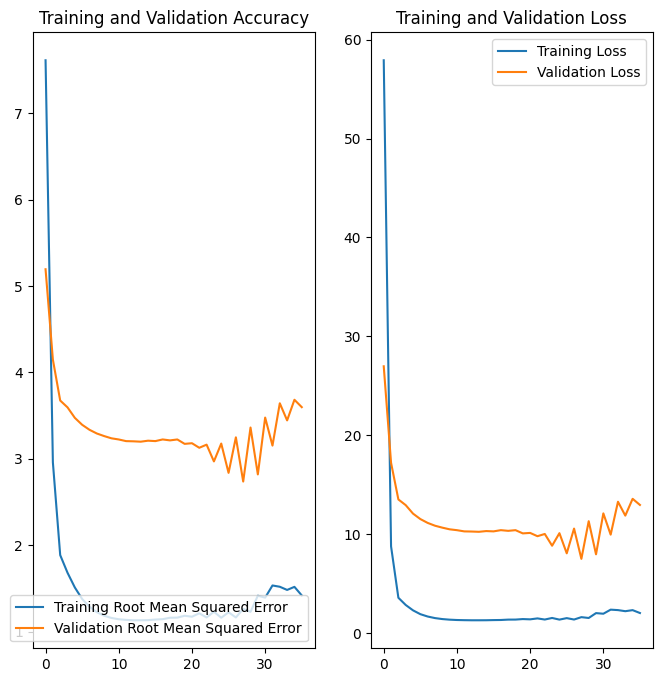

In [31]:
# code for plotting the results from the model for loss and root mean square error
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(36)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 2

In [32]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(32, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
# Compile model

opt = Adam()
model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               9344      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [34]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP2' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)


callbacks_list = [checkpoint, early_stopping]

In [35]:
history = model2.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
72/73 [============================>.] - ETA: 0s - loss: 91.0361 - root_mean_squared_error: 9.5413 - r2_score: -76.0663
Epoch 1: val_loss improved from inf to 93.98145, saving model to DMSP2_2023-06-1313_36_36.373388/model-00001-91.02475-9.54069-93.98145-9.69440.h5
73/73 [==============================] - 6s 46ms/step - loss: 91.0247 - root_mean_squared_error: 9.5407 - r2_score: -76.0430 - val_loss: 93.9815 - val_root_mean_squared_error: 9.6944 - val_r2_score: -94.1934
Epoch 2/100
69/73 [===========================>..] - ETA: 0s - loss: 85.5575 - root_mean_squared_error: 9.2497 - r2_score: -70.3485
Epoch 2: val_loss improved from 93.98145 to 83.92660, saving model to DMSP2_2023-06-1313_36_36.373388/model-00002-85.36597-9.23937-83.92660-9.16115.h5
73/73 [==============================] - 3s 42ms/step - loss: 85.3660 - root_mean_squared_error: 9.2394 - r2_score: -70.9456 - val_loss: 83.9266 - val_root_mean_squared_error: 9.1611 - val_r2_score: -83.9382
Epoch 3/100
70/73 [====

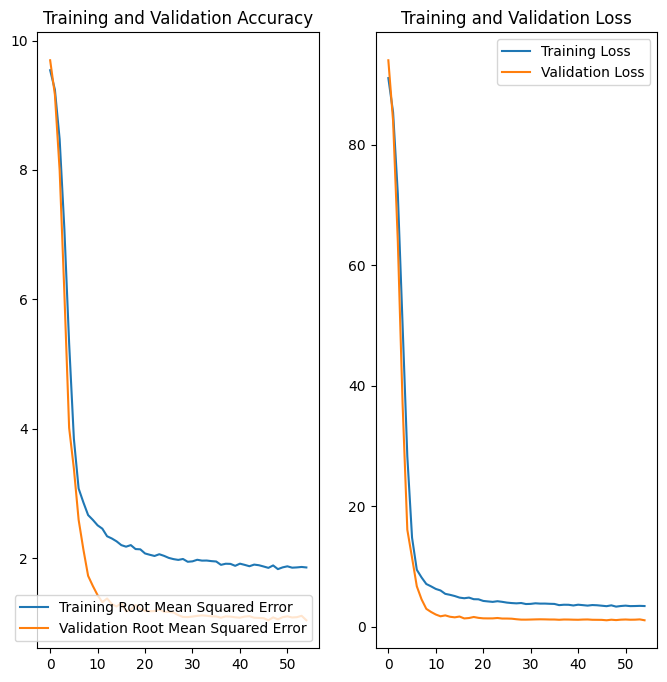

In [36]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(55)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 3

In [37]:
model3 = Sequential()
model3.add(Dense(256, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(128, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(32, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(1, kernel_initializer='uniform',activation='linear'))
# Compile model

opt = Adam(0.0001)
model3.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [38]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               18688     
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [39]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP3' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

# LR = # write the REducelronplateau code here
callbacks_list = [checkpoint, early_stopping]

In [40]:
history = model3.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=100, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
46/47 [============================>.] - ETA: 0s - loss: 92.4271 - root_mean_squared_error: 9.6139 - r2_score: -73.0315
Epoch 1: val_loss improved from inf to 96.97076, saving model to DMSP3_2023-06-1313_40_01.952646/model-00001-92.44457-9.61481-96.97076-9.84737.h5
47/47 [==============================] - 7s 75ms/step - loss: 92.4446 - root_mean_squared_error: 9.6148 - r2_score: -73.2172 - val_loss: 96.9708 - val_root_mean_squared_error: 9.8474 - val_r2_score: -95.4587
Epoch 2/100
43/47 [==========================>...] - ETA: 0s - loss: 92.1510 - root_mean_squared_error: 9.5995 - r2_score: -71.5584
Epoch 2: val_loss improved from 96.97076 to 96.49439, saving model to DMSP3_2023-06-1313_40_01.952646/model-00002-92.22933-9.60361-96.49439-9.82316.h5
47/47 [==============================] - 2s 40ms/step - loss: 92.2293 - root_mean_squared_error: 9.6036 - r2_score: -73.0456 - val_loss: 96.4944 - val_root_mean_squared_error: 9.8232 - val_r2_score: -94.9820
Epoch 3/100
41/47 [====

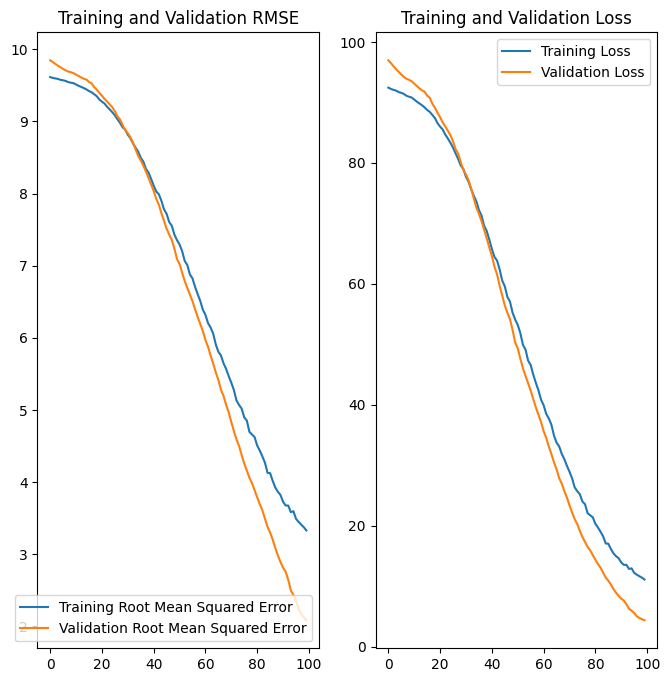

In [41]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 4

In [42]:
model4 = Sequential()
model4.add(Dense(512, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(256, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(128, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(64, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(32, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile model

opt = Adam(0.001)
model4.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [43]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               37376     
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 256)              

In [44]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP4' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)


callbacks_list = [checkpoint, early_stopping]

In [45]:
history = model4.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
70/73 [===========================>..] - ETA: 0s - loss: 91.0383 - root_mean_squared_error: 9.5414 - r2_score: -75.4026
Epoch 1: val_loss improved from inf to 93.88058, saving model to DMSP4_2023-06-1313_44_42.848775/model-00001-90.93933-9.53621-93.88058-9.68920.h5
73/73 [==============================] - 8s 48ms/step - loss: 90.9393 - root_mean_squared_error: 9.5362 - r2_score: -75.9512 - val_loss: 93.8806 - val_root_mean_squared_error: 9.6892 - val_r2_score: -94.0953
Epoch 2/100
68/73 [==========================>...] - ETA: 0s - loss: 85.4670 - root_mean_squared_error: 9.2448 - r2_score: -70.2042
Epoch 2: val_loss improved from 93.88058 to 83.98262, saving model to DMSP4_2023-06-1313_44_42.848775/model-00002-85.26973-9.23416-83.98262-9.16420.h5
73/73 [==============================] - 4s 53ms/step - loss: 85.2697 - root_mean_squared_error: 9.2342 - r2_score: -70.8239 - val_loss: 83.9826 - val_root_mean_squared_error: 9.1642 - val_r2_score: -84.0848
Epoch 3/100
71/73 [====

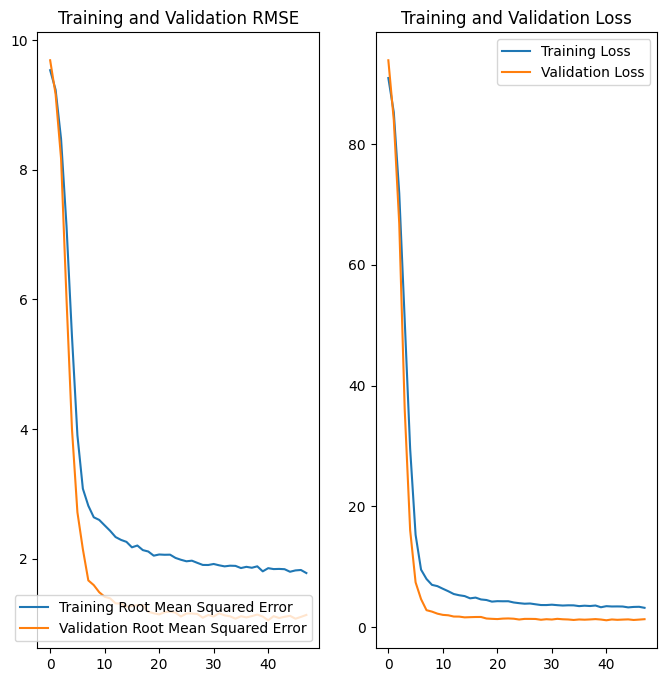

In [47]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(48)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 5

In [48]:
model5 = Sequential()
model5.add(Dense(512, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(256, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(128, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(64, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(32, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(16, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile model

opt = Adam(0.002)
model5.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [49]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               37376     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)               

In [50]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP5' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=0.001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

callbacks_list = [checkpoint, LR, early_stopping]

In [51]:
history = model5.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
70/73 [===========================>..] - ETA: 0s - loss: 32.0722 - root_mean_squared_error: 5.6632 - r2_score: -22.9153
Epoch 1: val_loss improved from inf to 23.44104, saving model to DMSP5_2023-06-1313_48_18.949764/model-00001-31.85321-5.64386-23.44104-4.84159.h5
73/73 [==============================] - 7s 51ms/step - loss: 31.8532 - root_mean_squared_error: 5.6439 - r2_score: -22.9843 - val_loss: 23.4410 - val_root_mean_squared_error: 4.8416 - val_r2_score: -20.8942 - lr: 0.0020
Epoch 2/100
66/73 [==========================>...] - ETA: 0s - loss: 16.0389 - root_mean_squared_error: 4.0049 - r2_score: -11.9564
Epoch 2: val_loss improved from 23.44104 to 21.14300, saving model to DMSP5_2023-06-1313_48_18.949764/model-00002-15.86568-3.98317-21.14300-4.59815.h5
73/73 [==============================] - 3s 41ms/step - loss: 15.8657 - root_mean_squared_error: 3.9832 - r2_score: -12.0130 - val_loss: 21.1430 - val_root_mean_squared_error: 4.5982 - val_r2_score: -19.2175 - lr: 0.00

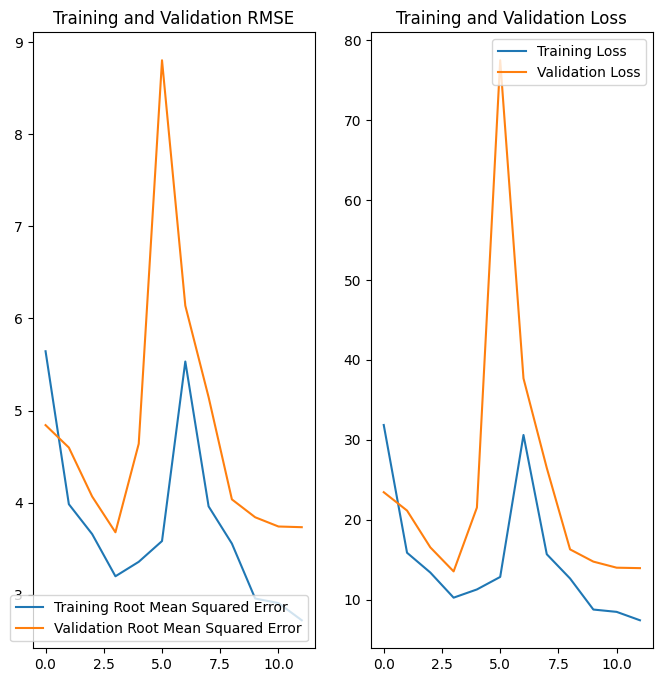

In [52]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
# as LSTM takes input in a particular format, we reshape the training and validation data
import numpy
train_X = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
#train_X = numpy.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
val_X = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

In [54]:
train_X

array([[[-1.30257863, -1.44256422, -0.01681795, ...,  0.19012527,
         -0.47749414,  0.49201846]],

       [[-1.02490731, -1.44256422, -0.02344413, ...,  0.19012527,
         -0.47749414,  0.49201846]],

       [[-0.2096066 , -1.44256422, -0.04327734, ...,  0.26407863,
         -0.65848259,  0.39562449]],

       ...,

       [[-1.06705786,  1.17351305, -1.15843804, ..., -0.54940832,
         -1.01830487, -1.22824303]],

       [[-1.37707409,  1.17351305, -1.15688476, ..., -0.54940832,
         -1.01830487, -1.22824303]],

       [[-1.68007419,  1.17351305, -1.15530243, ..., -0.54940832,
         -1.01830487, -1.22824303]]])

## Model 6

In [55]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1, activation='linear'))

opt = Adam(0.001)
model_lstm.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [56]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                35072     
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 35,137
Trainable params: 35,137
Non-trainable params: 0
_________________________________________________________________


In [57]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP6' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


callbacks_list = [checkpoint, early_stopping]

In [58]:
history = model_lstm.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
33/37 [=========================>....] - ETA: 0s - loss: 89.8224 - root_mean_squared_error: 9.4775 - r2_score: -68.8448
Epoch 1: val_loss improved from inf to 87.53779, saving model to DMSP6_2023-06-1313_50_01.661699/model-00001-89.79981-9.47628-87.53779-9.35616.h5
37/37 [==============================] - 6s 66ms/step - loss: 89.7998 - root_mean_squared_error: 9.4763 - r2_score: -70.3111 - val_loss: 87.5378 - val_root_mean_squared_error: 9.3562 - val_r2_score: -85.5542
Epoch 2/100
26/37 [====================>.........] - ETA: 0s - loss: 79.1707 - root_mean_squared_error: 8.8978 - r2_score: -55.7818
Epoch 2: val_loss improved from 87.53779 to 76.41644, saving model to DMSP6_2023-06-1313_50_01.661699/model-00002-78.56740-8.86382-76.41644-8.74165.h5
37/37 [==============================] - 1s 39ms/step - loss: 78.5674 - root_mean_squared_error: 8.8638 - r2_score: -61.2978 - val_loss: 76.4164 - val_root_mean_squared_error: 8.7416 - val_r2_score: -74.4828
Epoch 3/100
36/37 [====

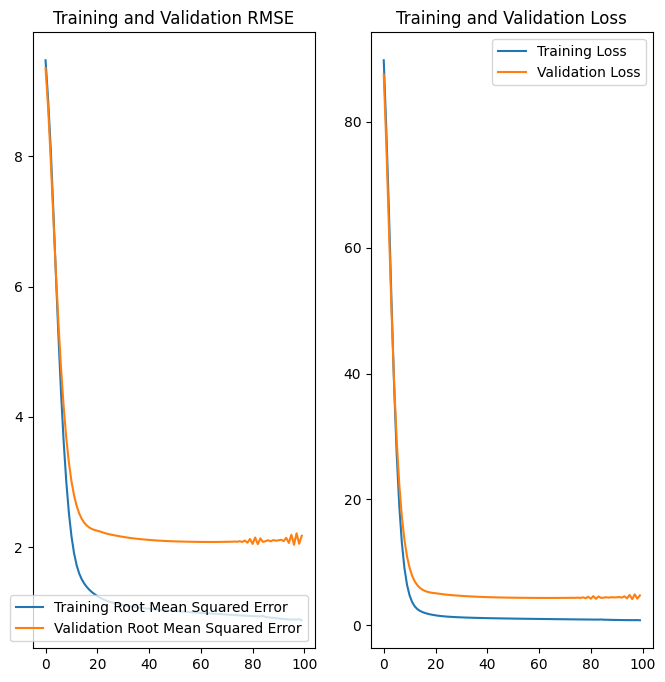

In [59]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 7

In [60]:
model_lstm2 = Sequential()
model_lstm2.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(64, activation=keras.layers.LeakyReLU(alpha=0.02)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(1, activation='linear'))
opt = Adam(0.001)
model_lstm2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [61]:
model_lstm2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               336896    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                16448     
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 353,409
Trainable params: 353,409
Non-trainable params: 0
_________________________________________________________________


In [62]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP7' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

callbacks_list = [checkpoint, early_stopping]

In [63]:
history = model_lstm2.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
33/37 [=========================>....] - ETA: 0s - loss: 85.1993 - root_mean_squared_error: 9.2303 - r2_score: -65.0544
Epoch 1: val_loss improved from inf to 66.11765, saving model to DMSP7_2023-06-1313_53_00.902214/model-00001-85.04243-9.22185-66.11765-8.13128.h5
37/37 [==============================] - 4s 55ms/step - loss: 85.0424 - root_mean_squared_error: 9.2218 - r2_score: -66.2936 - val_loss: 66.1177 - val_root_mean_squared_error: 8.1313 - val_r2_score: -65.2196
Epoch 2/100
33/37 [=========================>....] - ETA: 0s - loss: 47.0185 - root_mean_squared_error: 6.8570 - r2_score: -34.9316
Epoch 2: val_loss improved from 66.11765 to 19.41405, saving model to DMSP7_2023-06-1313_53_00.902214/model-00002-46.05235-6.78619-19.41405-4.40614.h5
37/37 [==============================] - 1s 40ms/step - loss: 46.0523 - root_mean_squared_error: 6.7862 - r2_score: -34.6477 - val_loss: 19.4141 - val_root_mean_squared_error: 4.4061 - val_r2_score: -17.9195
Epoch 3/100
35/37 [====

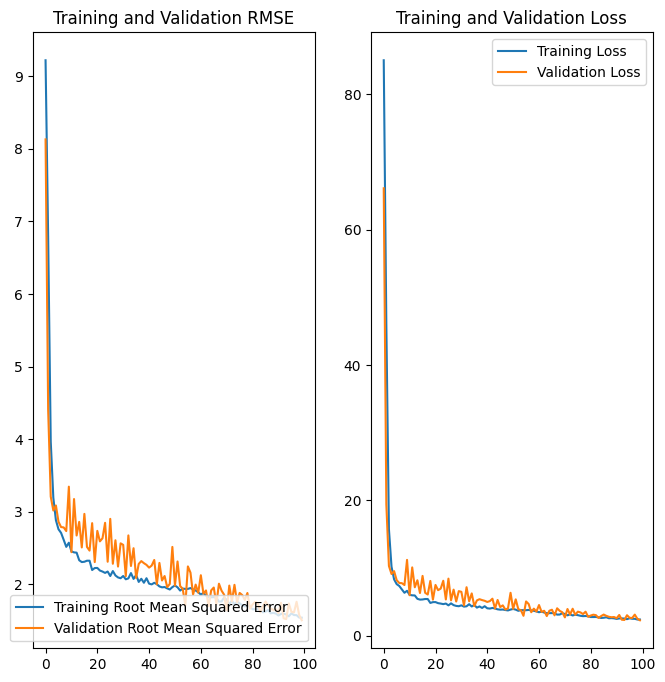

In [64]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
model_lstm3 = Sequential()
model_lstm3.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(128, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(64, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(16, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(8, activation=keras.layers.LeakyReLU(alpha=0.03)))
model_lstm3.add(Dropout(0.25))
model_lstm3.add(Dense(1, activation='linear'))
opt = Adam(0.001)
model_lstm3.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [66]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP8' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


callbacks_list = [checkpoint, early_stopping]

In [67]:
history = model_lstm3.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
34/37 [==========================>...] - ETA: 0s - loss: 86.1015 - root_mean_squared_error: 9.2791 - r2_score: -65.4044
Epoch 1: val_loss improved from inf to 52.74511, saving model to DMSP8_2023-06-1313_56_27.165154/model-00001-84.74804-9.20587-52.74511-7.26258.h5
37/37 [==============================] - 10s 93ms/step - loss: 84.7480 - root_mean_squared_error: 9.2059 - r2_score: -64.9626 - val_loss: 52.7451 - val_root_mean_squared_error: 7.2626 - val_r2_score: -50.4963
Epoch 2/100
29/37 [======================>.......] - ETA: 0s - loss: 39.2352 - root_mean_squared_error: 6.2638 - r2_score: -27.6962
Epoch 2: val_loss improved from 52.74511 to 15.44878, saving model to DMSP8_2023-06-1313_56_27.165154/model-00002-37.04671-6.08660-15.44878-3.93049.h5
37/37 [==============================] - 3s 78ms/step - loss: 37.0467 - root_mean_squared_error: 6.0866 - r2_score: -27.4826 - val_loss: 15.4488 - val_root_mean_squared_error: 3.9305 - val_r2_score: -14.5041
Epoch 3/100
36/37 [===

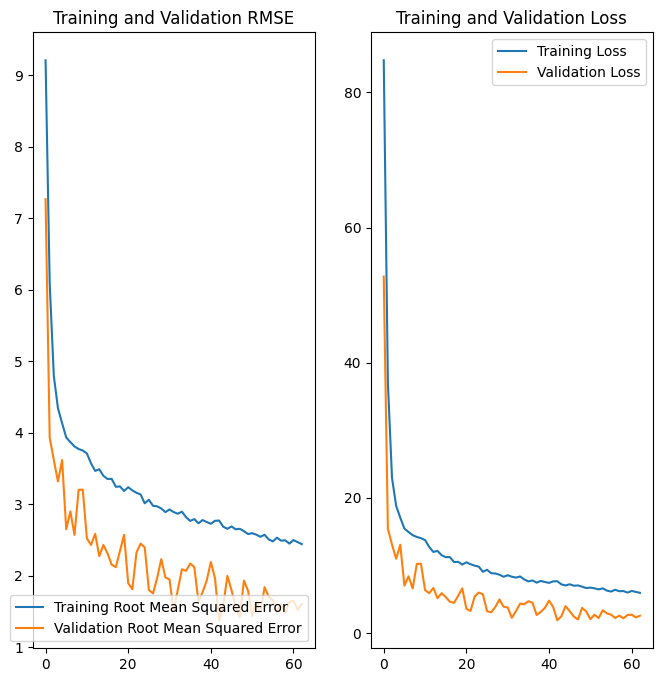

In [68]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(63)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()